## Students Acadamic performnce analysing with EDA


In [24]:
#import the libraries we need

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
#view the data
data=pd.read_csv(r"C:\Users\ganes\Downloads\archive (8).zip")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
#getting the info for check the columns and their types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
#to  check the null values in the dataset
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
#to check the duplicates in the dataset
duplicates =data[ data.duplicated()]
if duplicates.empty :
    print(" No duplicates found")
else:
    print("there is a duplicate value")
    print(duplicates)
    

 No duplicates found


In [30]:
#to check the statistical values
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
#getting the unique values that presented in the columns
data['race/ethnicity'].unique()
data['test preparation course'].unique()
data['lunch'].unique()


array(['standard', 'free/reduced'], dtype=object)

## Data Preprocessing

In [32]:
data.rename(columns={'math score':'math_score',
'reading score':'reading_score',
'writing score':'writing_score',
'parental level of education':'parental_level_of_education','test preparation course':'test_preparation_course'},inplace=True)



In [33]:
passmark = 35

In [34]:
#create new column that contains the percentage
data['percentage'] = (data['math_score']+data['writing_score']+data['reading_score'])/3  
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [35]:
#to check the dataset's shape
print(data.shape)

(1000, 9)


It indicates that there are 1000 Rows and 9 Columns presented in our dataset

## Data Visualization

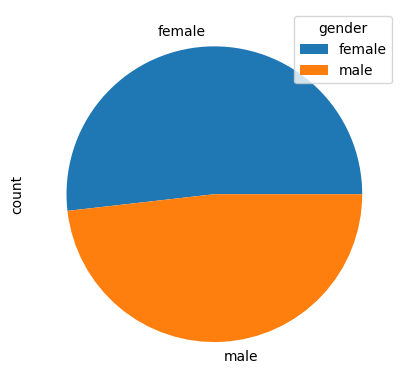

In [36]:

#creating pie chart 
(data['gender'].value_counts().plot(kind="pie"))
plt.legend(title='gender')



plt.show()

by this pie chart, we can identify that there is no bigger difference in gender as there are 52% female and 48% male.

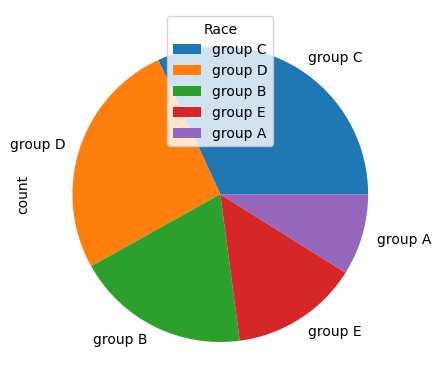

In [37]:
(data['race/ethnicity'].value_counts().plot(kind="pie"))
plt.legend(title='Race')

plt.show()


By this pie chart, we can say that more students belongs to Group C. And group A and group E has less students than other groups.

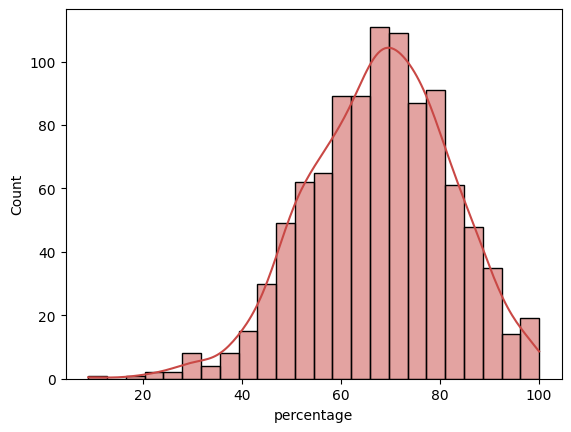

In [38]:
#create histogram
sns.histplot(data.percentage,color='#C94845',kde=True)
plt.show()

By this histogram, we get the insight that more students scored 60% to 70% and it's our average too.

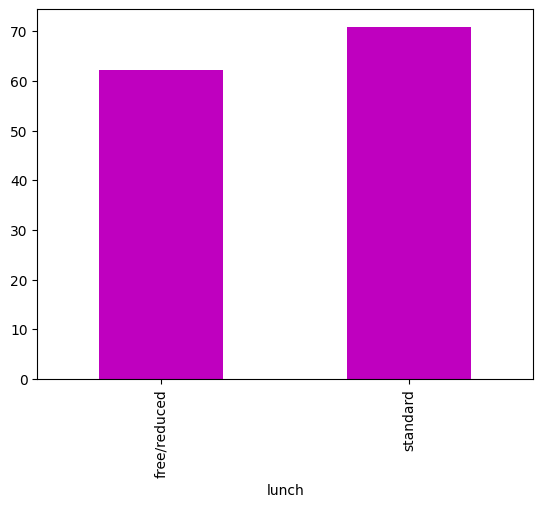

In [39]:
colours=('m')
data.groupby('lunch')['percentage'].mean().plot.bar(color=colours)
plt.show()

With this bar plot, the students who get standard lunch scores well in the exam compared to who have reduced lunch.

<Axes: xlabel='gender', ylabel='percentage'>

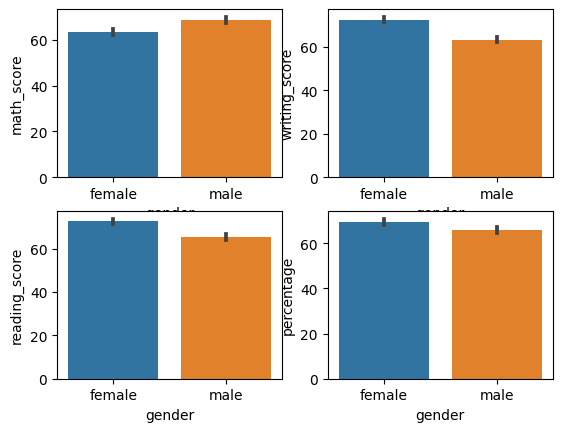

In [40]:
fig, axes = plt.subplots(2,2)


sns.barplot(data=data,x='gender',y='math_score',ax=axes[0,0])
sns.barplot(data=data,x='gender',y='writing_score',ax=axes[0,1])
sns.barplot(data=data,x='gender',y='reading_score',ax=axes[1,0])
sns.barplot(data=data,x='gender',y='percentage',ax=axes[1,1])




By this subplots, we can see that,
                Female students performed well in Reading, Writing.
                Also female students have good over-all percentage.
                While male students performed well in Maths.

<Axes: xlabel='race/ethnicity', ylabel='percentage'>

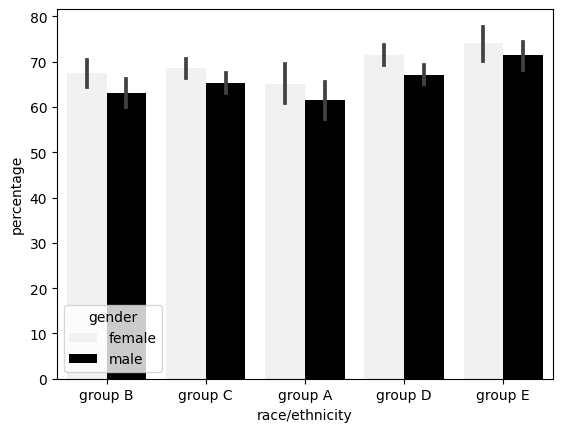

In [41]:
sns.barplot(x='race/ethnicity',y='percentage',data=data,hue="gender",color='black')

As per this barplot,
            Students from Group D and Group C have more percentage irrespective of their genders.
            Students from Group A (both male and female) poorly performed compared to others.

<Axes: xlabel='percentage', ylabel='Count'>

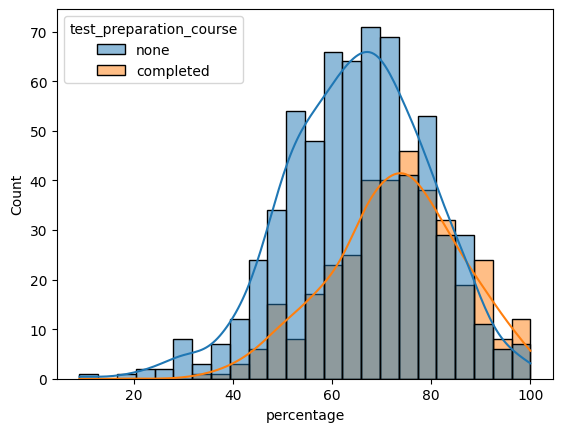

In [42]:
sns.histplot(x='percentage',data=data,hue='test_preparation_course',kde=True)

By this Bivariate Analysis, the information we get is: Students who completed the test preparation course scored well with the Average of above 75% meanwhile students who didn't complete the course have the Average of 65% only. Students who complete the preparation also scored full marks than students who didn't.

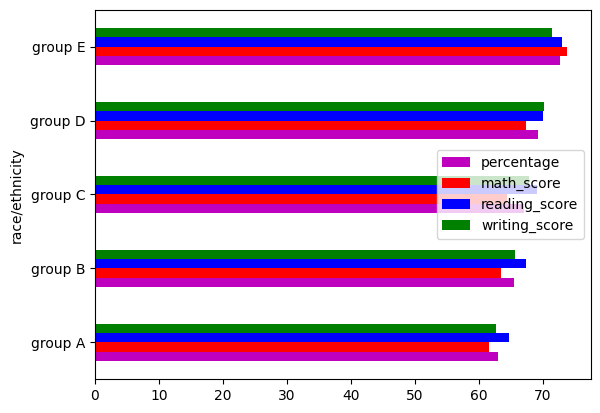

In [43]:
colours=('m','r','b','g')
data.groupby('race/ethnicity')[['percentage','math_score','reading_score','writing_score']].mean().plot.barh(color=colours)
plt.show()

<Axes: xlabel='parental_level_of_education', ylabel='percentage'>

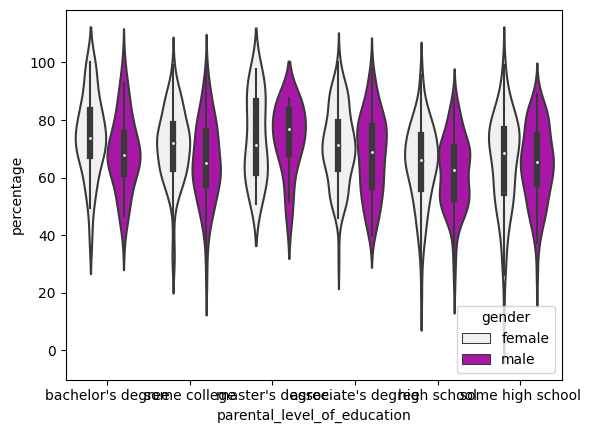

In [44]:
sns.violinplot(x="parental_level_of_education",y='percentage',data=data,hue='gender',color='m')

Here, we create a line plot to see if the parental level of education affect the students performance. Eventhough it doesn't affect the student's performance that much , we can see that students whose parent's have master degree really have the good percentage both male and female.  And there are more students whose parents completed the high scool level education.

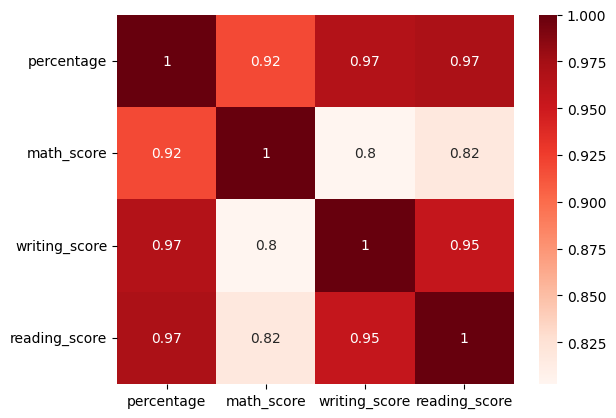

In [45]:
data[['percentage','math_score','writing_score','reading_score']].corr()
sns.heatmap(data[['percentage','math_score','writing_score','reading_score']].corr(),annot=True,cmap='Reds')
plt.show()

We create a heatmap to see the correlation between our data.  The scores have high correlation between them.  By this we can tell that students who scored in one subjext well, scored good marks in other subject also.

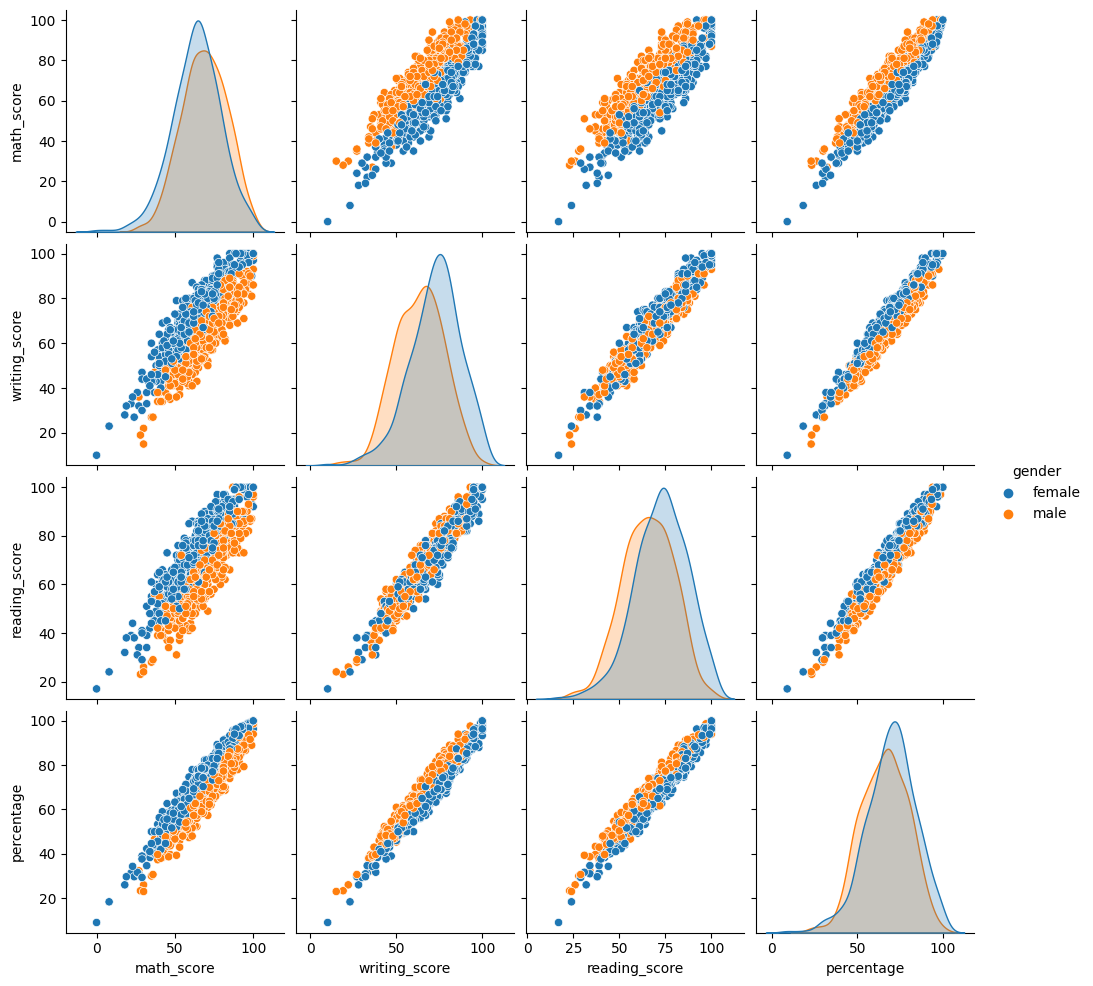

In [46]:
sns.pairplot(data=data,vars=['math_score','writing_score','reading_score','percentage'],hue='gender')
plt.show()

##
By this pairplot,
            Both male and femal students' scores in every subject highly correlated.
            And female students did really well than male students.

## Conclusion:
           With the dataset, I get from kaggle, first I get the info about my data, and checked for any null values and duplicates. Then with the help of Exploratory Data Analysis,  I get a lot of insights from the data. With that I can conclude that female students have the higher score than male students.  Student's whose parents has higher qualification, did well than others.  Coming to Race, most of the students belongs to Group C. And students from Group E did really well than others.  students who standard lunch performed well. And the students who completed their test preparation course has more full marks than students who didn't.   